In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import os
import sys
from pathlib import Path, PurePath
sys.path.append("..")
# For quicksort
sys.setrecursionlimit(int(1e7))

from src.linear_sorting_algorithms import radixsort
from src.quadratic_sorting_algorithms import bubble_sort, insertion_sort
from src.subquad_sorting_algorithms import quicksort, mergesort
from src.combined_sorting_algorithm import mergesort_combined

from src.utility import time_sorting_algorithms, ArrayGenerator

os.getcwd()
import matplotlib.pyplot as plt




In [47]:
if Path('../data').exists():
    data_directory = PurePath("../data")
    print(data_directory)

..\data


In [48]:
array_gen = ArrayGenerator(seed=12)

# N for 2-base generator, N^2
N = 1000
cols = {"Ascending" : np.single, "Descending" : np.single, "Random" : np.single, "Structured" : np.single, "Integers" :np.int32}

test_data = dict()

for i in range(2, N+1, 5):
    # Inverse of 2^N to create small steps
    n = i
    i = math.log2(i)
    
    data = np.array([array_gen.sorted_array(i),
            array_gen.reversed_array(i),
            array_gen.random_array(i),
            array_gen.structured_array(i),
            array_gen.integer_array(i)
           ])
    test_data[n] = pd.DataFrame(columns=cols.keys(), data=data.T).astype(cols)

In [49]:
len(test_data)

200

In [50]:
list_of_algorithms = [insertion_sort, mergesort]

df_results = pd.DataFrame(columns=["Algorithm", "N", "TypeArray", "Time"])

for N, Array in test_data.items():
    for TypeArray in cols.keys():
        
        for algorithm, times in time_sorting_algorithms(
            functions=list_of_algorithms, 
            array=Array[TypeArray].to_numpy(), 
            iters=5, 
            verbose=True
        ).items():
            
            for time in times:
                
                df_results = df_results.append(
                    {
                    "Algorithm": algorithm, "N": N, "TypeArray": TypeArray, "Time": time
                    }, 
                    ignore_index=True
                ) 

Timing array of 2 elements 5 times
Finished 'insertion_sort' in mean 0.0 +-[0.0] secs
Finished 'mergesort' in mean 0.0 +-[0.0] secs
Timing array of 2 elements 5 times
Finished 'insertion_sort' in mean 0.0 +-[0.0] secs
Finished 'mergesort' in mean 0.0 +-[0.0] secs
Timing array of 2 elements 5 times
Finished 'insertion_sort' in mean 0.0 +-[0.0] secs
Finished 'mergesort' in mean 0.0 +-[0.0] secs
Timing array of 2 elements 5 times
Finished 'insertion_sort' in mean 0.0 +-[0.0] secs
Finished 'mergesort' in mean 0.0 +-[0.0] secs
Timing array of 2 elements 5 times
Finished 'insertion_sort' in mean 0.0 +-[0.0] secs
Finished 'mergesort' in mean 0.0 +-[0.0] secs
Timing array of 7 elements 5 times
Finished 'insertion_sort' in mean 0.0 +-[0.0] secs
Finished 'mergesort' in mean 0.0 +-[0.0] secs
Timing array of 7 elements 5 times
Finished 'insertion_sort' in mean 0.0 +-[0.0] secs
Finished 'mergesort' in mean 0.0 +-[0.0] secs
Timing array of 7 elements 5 times
Finished 'insertion_sort' in mean 0.0 +-[

In [67]:
df_results["time/n(us)"] = ((df_results['Time']/df_results['N'])*1e6).to_numpy(dtype='float32')

In [68]:
#df_results[(df_results["Algorithm"] == "insertion_sort") | (df_results["Algorithm"] == "Ascending")]

In [69]:
df_results.dtypes

Algorithm      object
N              object
TypeArray      object
Time          float64
time/n(us)    float32
dtype: object

In [70]:
df_results.head()

,Algorithm,N,TypeArray,Time,time/n(us)
0,insertion_sort,2,Ascending,7.500000e-06,3.75
1,insertion_sort,2,Ascending,9.000000e-07,0.45
2,insertion_sort,2,Ascending,1.000000e-06,0.50
3,insertion_sort,2,Ascending,7.000001e-07,0.35
4,insertion_sort,2,Ascending,6.000000e-07,0.30


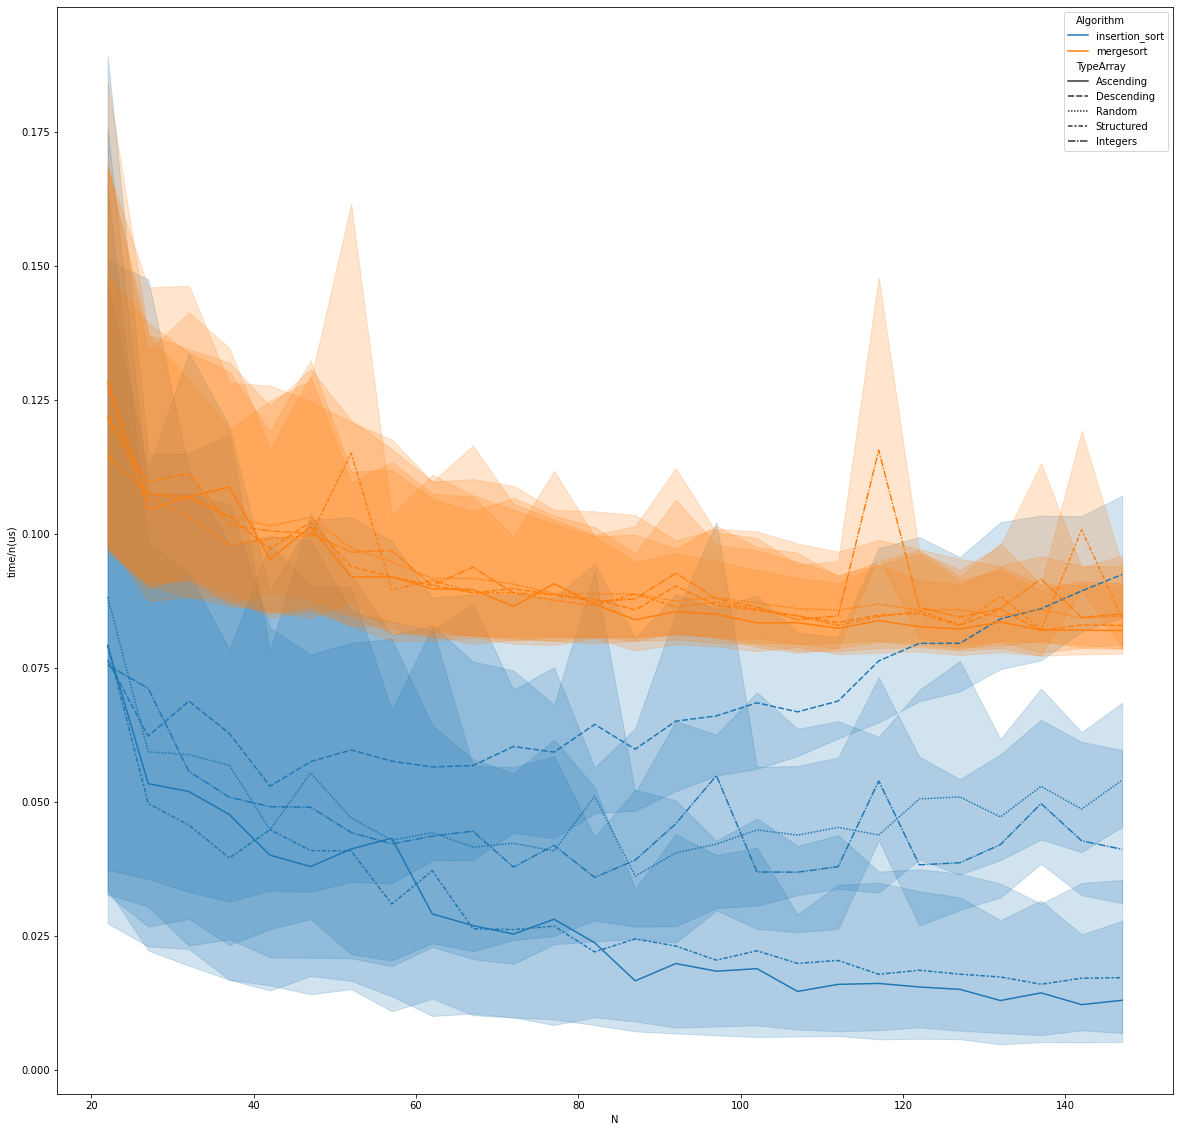

In [71]:
plt.figure(figsize=(20,20))
sns.lineplot(
    data=df_results.iloc[200:1500], 
    x="N", y="time/n(us)", hue="Algorithm", style="TypeArray")

In [53]:
mean_df = df_results.groupby(['Algorithm','N']).mean()
mean_df

Time
Algorithm      N            
insertion_sort 2    0.000002
               7    0.000002
               12   0.000001
               17   0.000002
               22   0.000002
...                      ...
mergesort      977  0.000078
               982  0.000078
               987  0.000078
               992  0.000082
               997  0.000079

[400 rows x 1 columns]

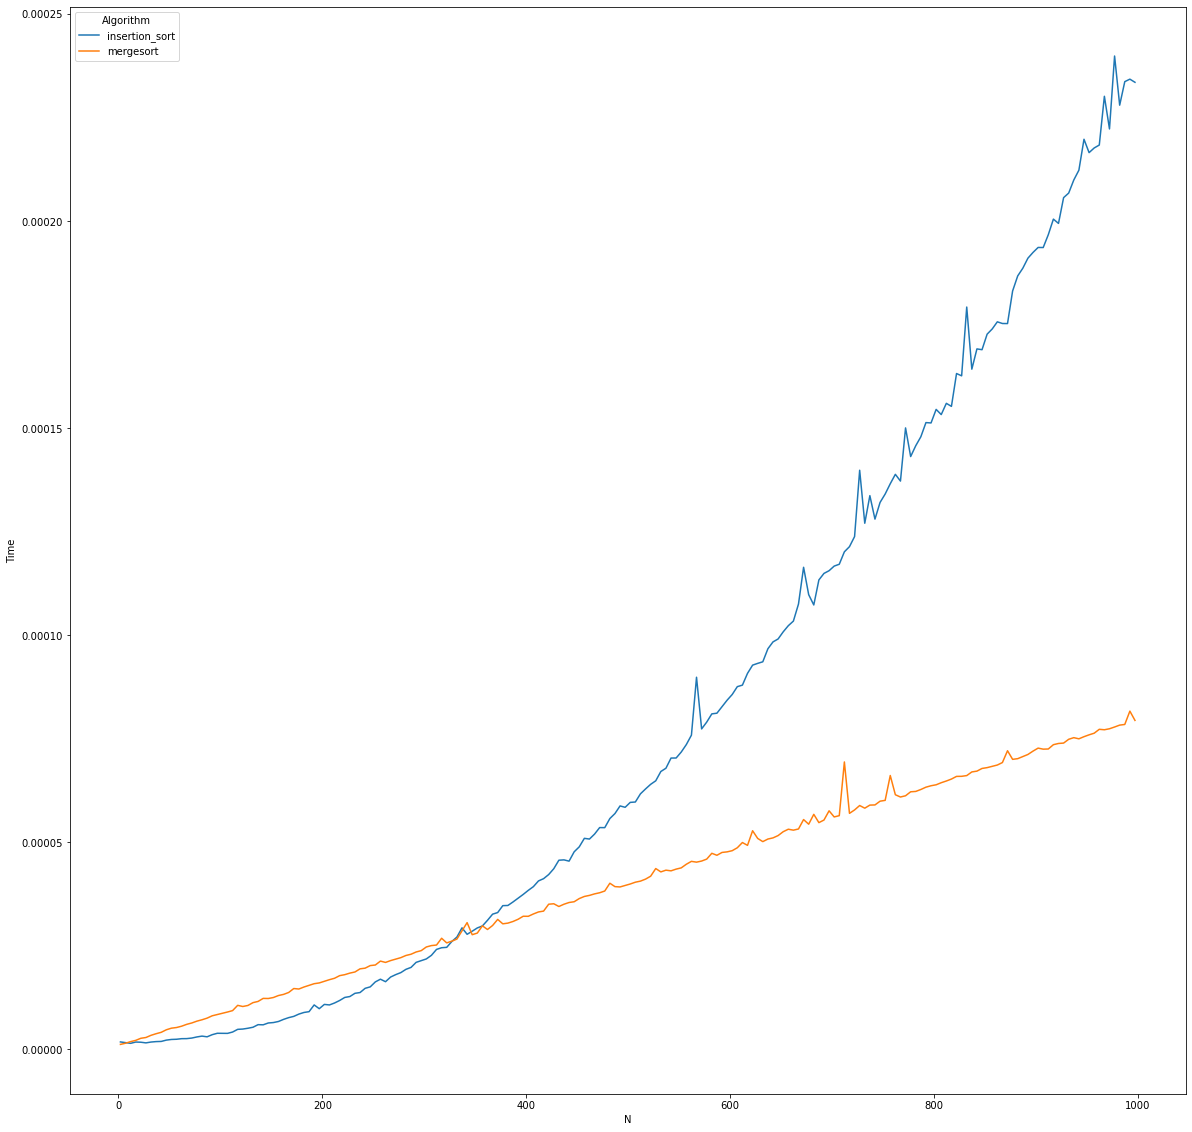

In [72]:
plt.figure(figsize=(20,20))
sns.lineplot(
    data=mean_df, 
    x="N", y="Time", hue="Algorithm")

In [101]:
delta_series = (mean_df.loc['mergesort', :].Time - mean_df.loc['insertion_sort', :].Time)
delta_series

N
2     -5.920000e-07
7     -1.560000e-07
12     4.120000e-07
17     4.040000e-07
22     9.520000e-07
           ...     
977   -1.619680e-04
982   -1.496440e-04
987   -1.551680e-04
992   -1.525520e-04
997   -1.540320e-04
Name: Time, Length: 200, dtype: float64

In [102]:
np.argmax(delta_series)

34

In [103]:
np.amax(delta_series)

6.720000010318472e-06

## Using $\Delta$ we have found the optimal threshold
**The results are averaged over all the different types of array, including best case and worst case for insertion sort**

We will use 34 as the threshold for using insertion sort

**note:** all functions have been Just in time compiled by numba jit function